In [1]:
import pandas as pd
import numpy as np

**1. Reading the Data from Dataset**

---



In [2]:
df_event = pd.read_csv("/content/Event Description Mapping.csv")
df_event

,event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General
5,dashboard_view_success,Dashboard Page Loading for a particular organi...,General
6,followup_button_clicked,Clicking Followup on a particular task/tasklog,Task
7,generate_report_success,Report for the overall work done generated for...,General
8,image_upload_success,User uploads an image on the app,General
9,indent_create_success,Material Added to Inventory,Material


In [3]:
df_user = pd.read_csv("/content/User - Event Raw Dataset.csv")
df_user

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
...,...,...,...,...,...
41172,2022-04-07 8:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645


**2. Generating statistics**

---



In [4]:
df_user.describe()

,created_at_time,event,org_id,project_id,user_id
count,41177,41177,41177,41036,41177
unique,36046,17,386,914,543
top,2022-03-03 18:55:17,material_profile_material_load,ORG546271885436,PRJ256203650640,USR509149973276
freq,4,10114,13318,12820,9594


**3. Calculated Results**

---



#Total 386 distinct companies
#Total 914 distinct projects
#Total 543 distinct Users

**4. Count the number of unique user IDs in the DataFrame for each organization**

---



In [5]:
df_user.groupby(["org_id"], as_index = False).user_id.count()

,org_id,user_id
0,ORG-2nufoaj370k,1
1,ORG-7fcq2k7b4xg,3
2,ORG-iluuim4club,20
3,ORG-o3wg0wxgykk,4
4,ORG-t4fhiiw79ej,1
...,...,...
381,ORG57j4uuf5s9hu,10
382,ORG588165160357,1
383,ORG588408773028,2
384,ORG588585401431,467


**5. Count the number of unique user IDs in the DataFrame for each unique project ID**

---



In [6]:
df_user.groupby(["project_id"], as_index = False).user_id.count()

,project_id,user_id
0,PRJ-5stoog9uym4,1
1,PRJ-7b16im-6gk7,86
2,PRJ-imro3q3t079,1
3,PRJ-n6t0t8aiy6p,1
4,PRJ003977810032,1
...,...,...
909,PRJzufi80cpcnll,5
910,PRJzw6mx0rh1c2h,17
911,PRJzx1g459coeiw,1
912,PRJzyxei9ufiq79,1



**6. Count the number of unique user IDs in the DataFrame "df_user" for each combination of "org_id" and "project_id"**

---



In [7]:
df_user.groupby(["org_id", "project_id"], as_index = False).user_id.count()

,org_id,project_id,user_id
0,ORG-2nufoaj370k,PRJ4k2kct6c5854,1
1,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,2
2,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,1
3,ORG-iluuim4club,PRJ1jrd11tr99dc,19
4,ORG-iluuim4club,PRJjial8edi2x63,1
...,...,...,...
912,ORG588585401431,PRJmx9b0j09hcqy,11
913,ORG588585401431,PRJqjh8kyvqikj4,15
914,ORG588585401431,PRJtemzymwdf5k5,7
915,ORG593668212572,PRJ436423104439,1


**7. Count the number of occurrences of each `user_id` in the DataFrame**

---



In [8]:
df_user.groupby(["user_id"]).org_id.count()

user_id
USR-dxj7tnl3dde      1
USR-r6ip6u098rf     29
USR-w9-buf-hzdi      1
USR001025373461     46
USR001462304016    177
                  ... 
USRz5vsgs2bkpzd      1
USRzhid5xfiufx2      4
USRzlihmftjyxxj      1
USRzsrw0plmw1b9      4
USRzw43egeq0ioy      3
Name: org_id, Length: 543, dtype: int64

**8. Count the number of unique projects per user in the DataFrame**

---

In [9]:
df_user.groupby(["user_id"]).project_id.count()

user_id
USR-dxj7tnl3dde      1
USR-r6ip6u098rf     29
USR-w9-buf-hzdi      1
USR001025373461     46
USR001462304016    177
                  ... 
USRz5vsgs2bkpzd      1
USRzhid5xfiufx2      4
USRzlihmftjyxxj      1
USRzsrw0plmw1b9      4
USRzw43egeq0ioy      3
Name: project_id, Length: 543, dtype: int64

**9.Count the number of unique organization IDs per project ID**

---



In [10]:
df_user.groupby(["project_id"]).org_id.count()

project_id
PRJ-5stoog9uym4      1
PRJ-7b16im-6gk7     86
PRJ-imro3q3t079      1
PRJ-n6t0t8aiy6p      1
PRJ003977810032      1
                  ... 
PRJzufi80cpcnll      5
PRJzw6mx0rh1c2h     17
PRJzx1g459coeiw      1
PRJzyxei9ufiq79      1
PRJzyzuaxnta6hh    577
Name: org_id, Length: 914, dtype: int64

**Patterns and insights from Datasets**
---

***Merge the two datasets on the 'event' column***

In [11]:
merged_df = df_user.merge(df_event, on='event', how='left')

**1. Frequency of events**

In [12]:
event_counts = merged_df['event'].value_counts()
event_counts

material_profile_material_load      10114
add_attendance_success               7569
stock_material_updated               7272
task_log_create_success              5010
comment_create_success               2054
channel_message_sent                 1867
generate_report_success              1701
task_creation                        1602
new_material_added                   1243
attendance_list_accessed              837
project_creation_request_success      651
dashboard_view_success                622
assigned_people_on_task               290
indent_create_success                 158
thread_create_success                  93
image_upload_success                   70
followup_button_clicked                24
Name: event, dtype: int64

**2. Explore events that activated and engaged users(Filtering events related to user engagement)**

In [13]:
engagement_events = merged_df['event']
engagement_data = merged_df[merged_df['event'].isin(engagement_events)]
engagement_data

,created_at_time,event,org_id,project_id,user_id,Description,Section
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating an update on a particula...,Task
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating a task,Task
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,Successfully creating an update on a particula...,Task
...,...,...,...,...,...,...,...
41172,2022-04-07 8:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372,Assigned another person on a particular task,Task
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372,Assigned another person on a particular task,Task
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674,Assigned another person on a particular task,Task
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645,Successfully creating a task,Task


**3. Time-based analysis**

> a. Converting the 'created_at_time' column to datetime

In [14]:
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'])

> b. Extracting date

In [15]:
merged_df['date'] = merged_df['created_at_time'].dt.date

> c.  Calculating event counts by date

In [16]:
date_event_counts = merged_df['date'].value_counts().sort_index()
date_event_counts

2022-01-01     4
2022-01-02     1
2022-01-03    56
2022-01-04    36
2022-01-05    83
              ..
2023-02-19    42
2023-02-20    34
2023-02-21    26
2023-02-22    35
2023-02-23    34
Name: date, Length: 415, dtype: int64

# **Organization and Project-level insights**

**Group the data by organization and project**

In [17]:
org_project_summary = merged_df.groupby(['org_id', 'project_id'])['event'].count()

**Ploting a bar chart of event description counts**

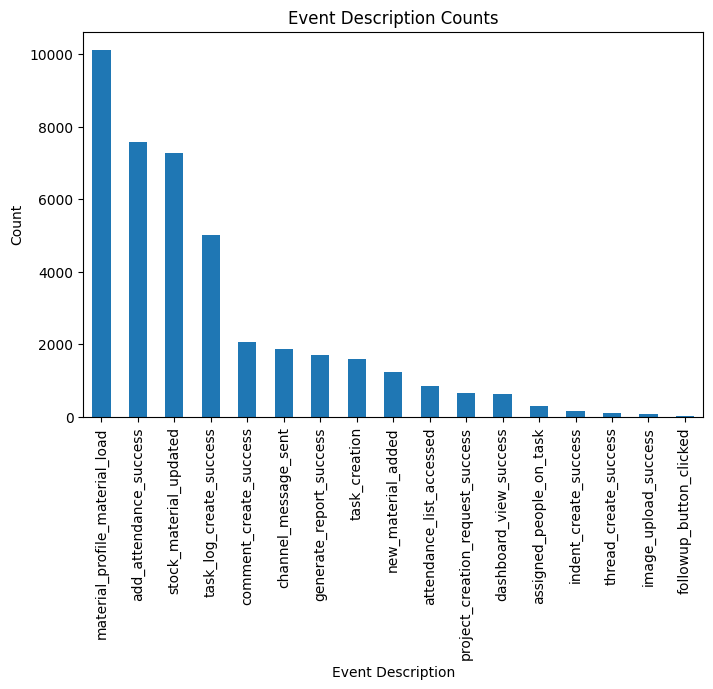

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
event_counts.plot(kind='bar')
plt.title('Event Description Counts')
plt.xlabel('Event Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **Useful Analysis**

**1. Analyze user behavior based on specific event descriptions**

In [19]:
selected_event_descriptions = ['Successfully creating a new project', 'Successfully creating a task']

for description in selected_event_descriptions:
    event_data = merged_df[merged_df['Description'] == description]
    user_counts = event_data['user_id'].nunique()
    print(f"Users performing '{description}': {user_counts}")


Users performing 'Successfully creating a new project': 401
Users performing 'Successfully creating a task': 245


**2. Identifying the top 10 most active or engaged users within the app**

In [20]:
user_event_counts = df_user.groupby("user_id")["event"].count().reset_index()
# Sort the users by the number of events in descending order
user_event_counts = user_event_counts.sort_values(by="event", ascending=False)

top_10_users = user_event_counts.head(10)

top_10_users

,user_id,event
184,USR509149973276,9594
136,USR395096428126,2608
247,USR659222931763,2029
209,USR594255074022,1308
248,USR660555701919,1280
246,USR658789223695,1176
51,USR120703039949,1149
326,USR912394666892,1139
65,USR181303348512,970
447,USRkiz6dyjgdxwh,967


**3. identify insights and triggers that activate and engage users from the given datasets**

a. Counting Activation events

In [21]:
# Merge the datasets based on the 'event' column
# merged_df = df_user.merge(df_event, on='event', how='left')

# Define the events that activate and engage users (customize this list based on your domain knowledge)
activation_events = ['project_creation_request_success']
engagement_events = ['task_creation', 'followup_button_clicked', 'comment_create_success', '...']

# Filter the dataset for activation and engagement events
activation_df = merged_df[merged_df['event'].isin(activation_events)]
engagement_df = merged_df[merged_df['event'].isin(engagement_events)]

# Analyze activation events
activation_event_counts = activation_df['event'].value_counts()
print("Activation Events:")
activation_event_counts




Activation Events:


project_creation_request_success    651
Name: event, dtype: int64

b. Counting engagement events

In [22]:
# Analyze engagement events
engagement_event_counts = engagement_df['event'].value_counts()
print("\nEngagement Events:")
engagement_event_counts



Engagement Events:


comment_create_success     2054
task_creation              1602
followup_button_clicked      24
Name: event, dtype: int64

c. we can analyze how frequently activation events are followed by engagement events.

In [23]:
activation_engagement_counts = merged_df.groupby('event')['event'].count()
print("\nActivation Followed by Engagement Events:")
activation_engagement_counts




Activation Followed by Engagement Events:


event
add_attendance_success               7569
assigned_people_on_task               290
attendance_list_accessed              837
channel_message_sent                 1867
comment_create_success               2054
dashboard_view_success                622
followup_button_clicked                24
generate_report_success              1701
image_upload_success                   70
indent_create_success                 158
material_profile_material_load      10114
new_material_added                   1243
project_creation_request_success      651
stock_material_updated               7272
task_creation                        1602
task_log_create_success              5010
thread_create_success                  93
Name: event, dtype: int64

d. We can also calculate engagement rate after activation events by dividing the engagement counts by activation counts.

In [24]:
engagement_rate = engagement_event_counts / activation_event_counts
print("\nEngagement Rate After Activation:")
engagement_rate


Engagement Rate After Activation:


comment_create_success             NaN
followup_button_clicked            NaN
project_creation_request_success   NaN
task_creation                      NaN
Name: event, dtype: float64

# **What I have achieved from this analysis ?**

**1.In given dataset there are**

> 386 distinct Companies

> 914 distinct Projects

> 543 distinct Users

**2. Datewise event counts have been calculated to track the distribution of events over each day**

**3. I have examined user behavior by focusing on specific event descriptions such as "Successfully creating a new project" and "Successfully creating a task."**

**4. I have identified the top 10 most active users within the app based on their extensive engagement and interaction patterns**